In [1]:
from qick_data import *
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

### Get filenames to import

In [2]:
datapath = 'c:\\Users\\Hannah\\Desktop\\SLAC\\squat2\\Data\\2024-05-13_QICK_overnight'
os.getcwd()
os.chdir(datapath)

## Import data, sort by transmission line ("TL") or charge bias line ("CB") scan type
TL_flist = []
CB_flist = []
dirlist = os.listdir()
for fn in dirlist:
    if fn[-5:] == 'TL.h5':
        TL_flist.append(fn)
    elif fn[-5:] == 'CB.h5':
        CB_flist.append(fn)


### Intro to data handling setup

I am storing each measurement in a class called ``QICKdata``.  The purpose of this class is to organize import/exporting.  There is not much to it.  The class holds four dictionaries:
1. ``meta`` contains metadata, including a timestamp, measurement type, and device
2. ``hw_cfg`` contains the DAC/ADC channels used.  If an LO was used for the measurement, it is recorded here.
3. ``meas_cfg`` contains the QICK pulse parameters used in the measurement
4. ``meas_data`` contains the measurement data.  In the case of 2-variable sweeps, I have been including a string in this dictionary that indicates which sweep axis is which in the IQ arrays.

We can open a file to see an example of this organization:

In [3]:
d = read_H5(datapath=datapath, filename=TL_flist[0], dataclass=QICKdata)
print(d)
print("\n\n------------------META DICT------------------------")
print(d.meta)
print("\n\n----------------HW CFG DICT ------------------------")
print(d.hw_cfg)
print("\n\n---------------MEAS CFG DICT------------------------")
print(d.meas_cfg)
print("\n\n---------------MEAS DATA DICT-----------------------")
## print keys in the dictionayr
print(d.meas_data.keys())
print("(just printing keys here because the data arrays are large)")


Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\2024-05-13_QICK_overnight
Creating dataset with series 20240513_014809
====---------------------------====
         20240513_014809
====---------------------------====
       Device =  C11
       Qubits =  [1.]
    Meas Type =  freq_scan_TL
====---------------------------====
20240513_014809


------------------META DICT------------------------
{'device': 'C11', 'meas_type': 'freq_scan_TL', 'qubits': array([1.]), 'series': '20240513_014809'}


----------------HW CFG DICT ------------------------
{'res_ch': 6, 'ro_ch': 1}


---------------MEAS CFG DICT------------------------
{'adc_trig_offset': 218, 'readout_length': 860, 'relax_delay': 172, 'reps': 50000, 'res_gain': 6000, 'res_length': 860, 'res_phase': 0, 'res_style': 'const', 'soft_avgs': 1}


---------------MEAS DATA DICT-----------------------
dict_keys(['Ivals', 'Qvals', 'RF_freqs'])
(just printing keys here because the data arrays are large)


## Convert series of 1D frequency scans into a 2D measurement
Have had issues in the past with measurements crashing overnight.  To avoid this, I ran repeated frequency scans and saved data after each scan.  Now I want to plot them together as a function of time.

In [4]:
def series_to_date(series):
    year = int(str(series)[0:4])
    month = int(str(series)[4:6])
    day = int(str(series)[6:8])
    hour = int(str(series)[8:10])
    minute = int(str(series)[10:12])
    second = int(str(series)[12:14])
    return(datetime.datetime(year, month, day, hour, minute, second))

def series_list_to_elapsed_time(series_list):
    starttime = series_to_date(series_list[0])
    elapsed_time = np.zeros(len(series_list))
    for i, series in enumerate(series_list):
        elapsed_time[i] = (series_to_date(series) - starttime).total_seconds()
    return(elapsed_time)

In [11]:
## Collect all TL data into a 2D array
TL_amps = np.zeros((len(TL_flist), len(d.meas_data['Ivals'])))
TL_phases = np.zeros((len(TL_flist), len(d.meas_data['Ivals'])))
TL_series_list = np.zeros(len(TL_flist))                 
for i, fn in enumerate(TL_flist):
    d = read_H5(datapath=datapath, filename=fn, dataclass=QICKdata)
    amps = np.abs(d.meas_data['Ivals'] + 1j*d.meas_data['Qvals'])
    phases = np.angle(d.meas_data['Ivals'] + 1j*d.meas_data['Qvals'])
    TL_amps[i] = amps
    TL_phases[i] = phases
    TL_series_list[i] = d.meta['series']
## Convert timestamps to elapsed time in hours
TL_elapsed_time = series_list_to_elapsed_time(TL_series_list)/60/60


## Repeat for CB data
CB_amps = np.zeros((len(CB_flist), len(d.meas_data['Ivals'])))
CB_phases = np.zeros((len(CB_flist), len(d.meas_data['Ivals'])))
CB_series_list = np.zeros(len(CB_flist))                 
for i, fn in enumerate(CB_flist):
    d = read_H5(datapath=datapath, filename=fn, dataclass=QICKdata)
    amps = np.abs(d.meas_data['Ivals'] + 1j*d.meas_data['Qvals'])
    phases = np.angle(d.meas_data['Ivals'] + 1j*d.meas_data['Qvals'])
    CB_amps[i] = amps
    CB_phases[i] = phases
    CB_series_list[i] = d.meta['series']

## Convert timestamps to elapsed time in hours
CB_elapsed_time = series_list_to_elapsed_time(CB_series_list)/60/60

Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\2024-05-13_QICK_overnight
Creating dataset with series 20240513_014809
Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\2024-05-13_QICK_overnight
Creating dataset with series 20240513_015218
Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\2024-05-13_QICK_overnight
Creating dataset with series 20240513_015627
Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\2024-05-13_QICK_overnight
Creating dataset with series 20240513_020035
Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\2024-05-13_QICK_overnight
Creating dataset with series 20240513_020444
Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\2024-05-13_QICK_overnight
Creating dataset with series 20240513_020853
Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\2024-05-13_QICK_overnight
Creating dataset with series 20240513_021301
Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data

### Make plots!

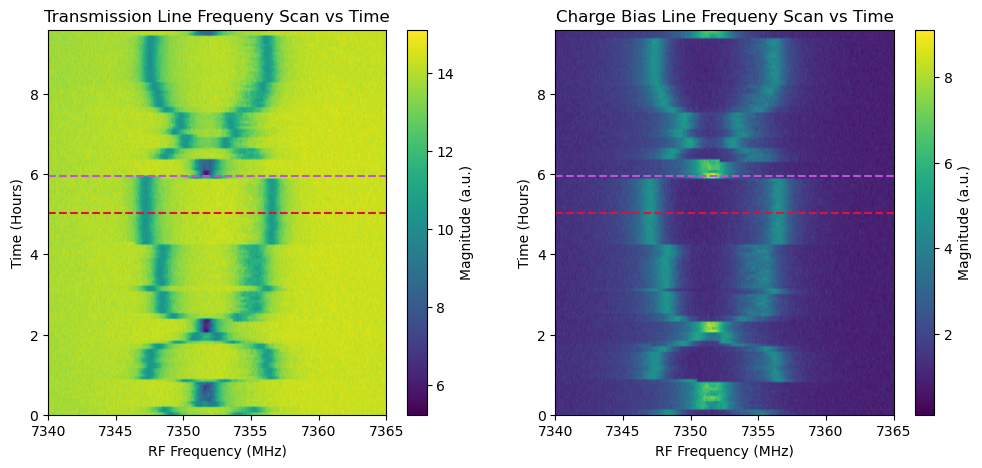

In [75]:
fig = plt.figure(figsize=(12,5))
ax0 = plt.subplot(121)
im = ax0.imshow(TL_amps, aspect='auto', origin="lower", extent=[d.meas_data['RF_freqs'][0], d.meas_data['RF_freqs'][-1], TL_elapsed_time[0], TL_elapsed_time[-1]])
plt.xlabel('RF Frequency (MHz)')
plt.ylabel('Time (Hours)')
plt.title("Transmission Line Frequeny Scan vs Time")
cbar = fig.colorbar(im)
cbar.set_label('Magnitude (a.u.)')
plt.axhline(5.04, color='crimson', linestyle='--')
plt.axhline(5.95, color='mediumorchid', linestyle='--')


ax1 = plt.subplot(122)
im = ax1.imshow(CB_amps, aspect='auto', origin="lower", extent=[d.meas_data['RF_freqs'][0], d.meas_data['RF_freqs'][-1], CB_elapsed_time[0], CB_elapsed_time[-1]])
plt.xlabel('RF Frequency (MHz)')
plt.ylabel('Time (Hours)')
plt.title("Charge Bias Line Frequeny Scan vs Time")
cbar = fig.colorbar(im)
cbar.set_label('Magnitude (a.u.)')
plt.axhline(5.04, color='crimson', linestyle='--')
plt.axhline(5.95, color='mediumorchid', linestyle='--')

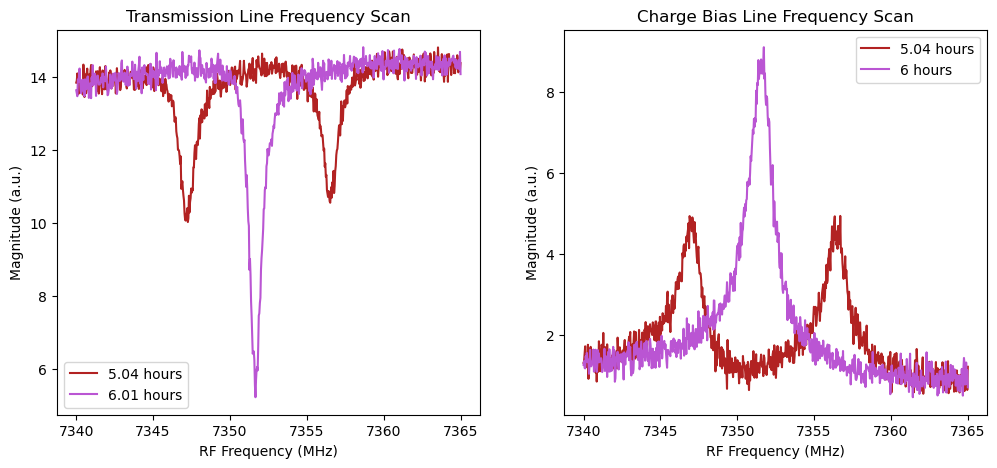

In [76]:
max_index = 73
min_index_CB = 86
min_index_TL = 87

## Plot at a single time index
fig = plt.figure(figsize=(12,5))
ax0 = plt.subplot(121)
ax0.plot(d.meas_data['RF_freqs'], TL_amps[max_index], label=f"{round(TL_elapsed_time[max_index], 2)} hours", color="firebrick")
ax0.plot(d.meas_data['RF_freqs'], TL_amps[min_index_TL], label=f"{round(TL_elapsed_time[min_index_TL], 2)} hours", color="mediumorchid")
ax0.legend()

plt.xlabel('RF Frequency (MHz)')
plt.ylabel('Magnitude (a.u.)')
plt.title("Transmission Line Frequency Scan")

ax1 = plt.subplot(122)
ax1.plot(d.meas_data['RF_freqs'], CB_amps[max_index], label=f"{round(CB_elapsed_time[max_index], 2)} hours", color="firebrick")
ax1.plot(d.meas_data['RF_freqs'], CB_amps[min_index_CB], label=f"{round(CB_elapsed_time[min_index_CB])} hours", color="mediumorchid")
plt.xlabel('RF Frequency (MHz)')
plt.ylabel('Magnitude (a.u.)')
plt.title("Charge Bias Line Frequency Scan")
ax1.legend()
